In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('Shopping Mall Customer Segmentation Data .csv')
df.head()


,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [3]:
# Set column names to match your structure
df.columns = ['Customer ID', 'Age', 'Gender', 'Annual Income', 'Spending Score']

In [4]:
# --- Step 1: Data Preparation ---
# Drop Customer ID since it’s irrelevant for clustering
df = df.drop('Customer ID', axis=1)
print("Columns after dropping 'Customer ID':", df.columns.tolist())

Columns after dropping 'Customer ID': ['Age', 'Gender', 'Annual Income', 'Spending Score']


In [5]:
# Check actual data types
print("\nActual Data Types:\n", df.dtypes)


Actual Data Types:
 Age                int64
Gender            object
Annual Income      int64
Spending Score     int64
dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             15079 non-null  int64 
 1   Gender          15079 non-null  object
 2   Annual Income   15079 non-null  int64 
 3   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 471.3+ KB


In [7]:
# Handle Gender: Check if it’s a string and encode if necessary
if df['Gender'].dtype == 'object':
    print("Gender is a string column. Applying LabelEncoder...")
    label_encoder = LabelEncoder()
    df['Gender'] = label_encoder.fit_transform(df['Gender'])
    print("Gender encoded values (e.g., 0=Male, 1=Female):", df['Gender'].unique())
else:
    print("Gender is already numeric:", df['Gender'].unique())

# Verify all columns are numeric
for col in df.columns:
    if df[col].dtype not in ['int64', 'float64']:
        print(f"Warning: Column '{col}' is not numeric: {df[col].dtype}")
    else:
        print(f"Column '{col}' is numeric: {df[col].dtype}")

Gender is a string column. Applying LabelEncoder...
Gender encoded values (e.g., 0=Male, 1=Female): [1 0]
Column 'Age' is numeric: int64
Column 'Annual Income' is numeric: int64
Column 'Spending Score' is numeric: int64


In [8]:
## Exploratory Data Analysis (EDA)
print("\nEDA Summary Statistics:")
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())


EDA Summary Statistics:
                Age        Gender  Annual Income  Spending Score
count  15079.000000  15079.000000   15079.000000    15079.000000
mean      54.191591      0.503681  109742.880562       50.591617
std       21.119207      0.500003   52249.425866       28.726977
min       18.000000      0.000000   20022.000000        1.000000
25%       36.000000      0.000000   64141.000000       26.000000
50%       54.000000      1.000000  109190.000000       51.000000
75%       72.000000      1.000000  155008.000000       75.000000
max       90.000000      1.000000  199974.000000      100.000000

Missing Values:
 Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64


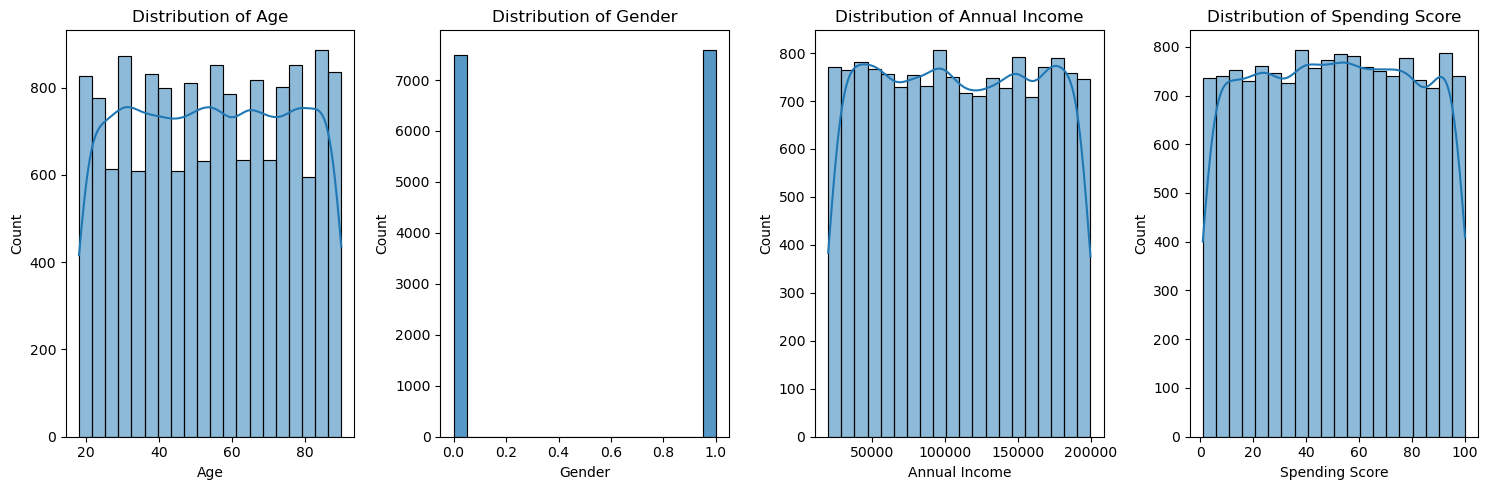

In [81]:
# Plot distributions
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Gender', 'Annual Income', 'Spending Score'], 1):
    plt.subplot(1, 4, i)
    sns.histplot(df[col], bins=20, kde=(col != 'Gender'))  # No KDE for Gender
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

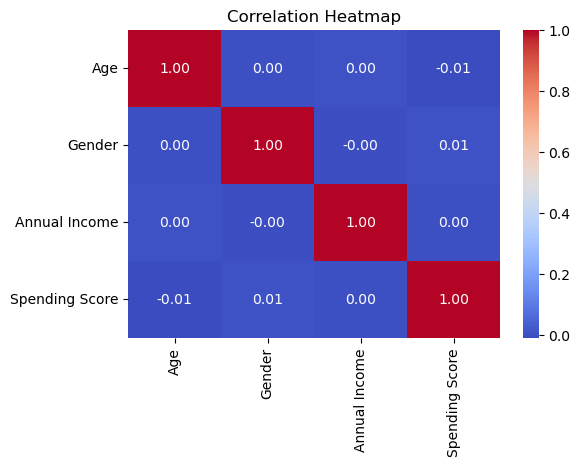

In [82]:
# Correlation heatmap (only numeric columns)
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

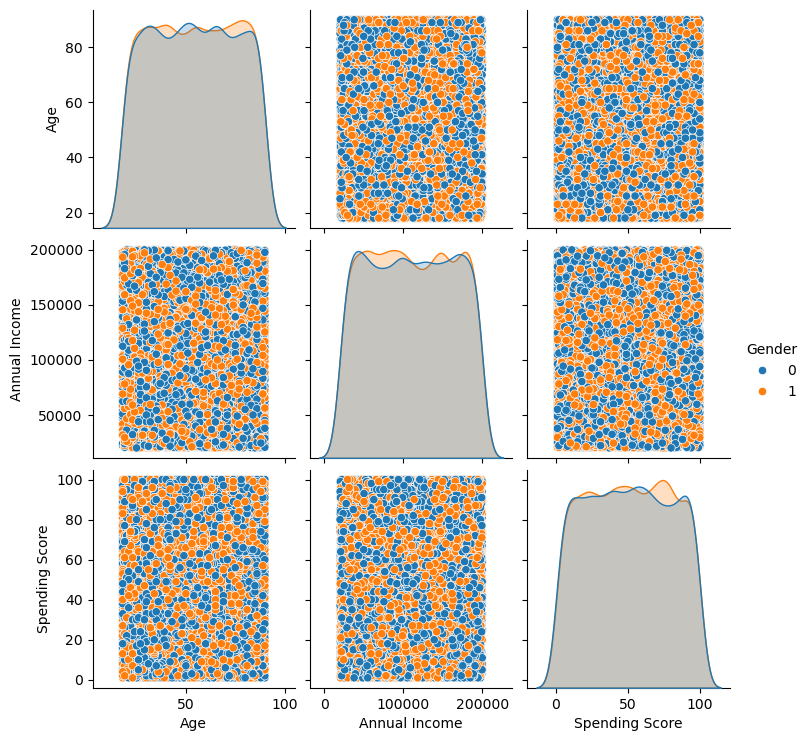

In [83]:
# Pairplot
sns.pairplot(df, hue='Gender')
plt.show()

In [9]:
# Data Preprocessing
# Select features for clustering
features = ['Age', 'Gender', 'Annual Income', 'Spending Score']
X = df[features]
print("\nFeatures selected for clustering:\n", X.head())


Features selected for clustering:
    Age  Gender  Annual Income  Spending Score
0   30       1         151479              89
1   58       0         185088              95
2   62       0          70912              76
3   23       1          55460              57
4   24       1         153752              76


In [10]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

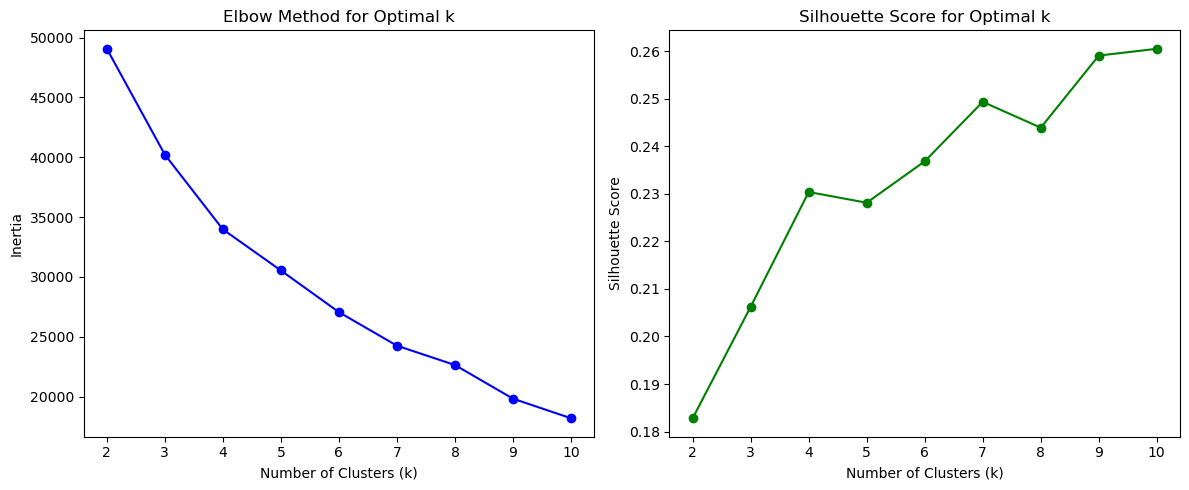

In [12]:
# Determine Optimal Number of Clusters 
inertia = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Curve and Silhouette Score
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.tight_layout()
plt.show()

In [13]:
# Choose optimal k (adjust based on plots; 5 is a common choice for this dataset)
optimal_k = 5
print(f"Chosen number of clusters: {optimal_k}")

Chosen number of clusters: 5


In [14]:
# Apply K-Means Clustering ---
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [15]:
# Interpret Segments 
print("\nCluster Analysis:")
cluster_summary = df.groupby('Cluster').agg({
    'Gender': ['mean', 'count'],
    'Age': ['mean', 'min', 'max'],
    'Annual Income': ['mean', 'min', 'max'],
    'Spending Score': ['mean', 'min', 'max']
}).round(2)
print(cluster_summary)

for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    print(f"- Avg Gender (0=Male, 1=Female): {cluster_summary['Gender']['mean'][cluster]}")
    print(f"- Avg Age: {cluster_summary['Age']['mean'][cluster]}")
    print(f"- Avg Annual Income: {cluster_summary['Annual Income']['mean'][cluster]} k$")
    print(f"- Avg Spending Score: {cluster_summary['Spending Score']['mean'][cluster]}")
    print(f"- Number of Customers: {cluster_summary['Gender']['count'][cluster]}")


Cluster Analysis:
        Gender          Age         Annual Income                 \
          mean count   mean min max          mean    min     max   
Cluster                                                            
0          0.0  2382  34.16  18  56     106577.97  20375  199934   
1          1.0  3845  53.17  18  90     111121.63  20026  199974   
2          1.0  3750  55.32  18  90     108010.05  20089  199903   
3          0.0  2770  55.19  18  90     109243.85  20022  199963   
4          0.0  2332  73.33  51  90     114081.63  20099  199904   

        Spending Score           
                  mean min  max  
Cluster                          
0                33.42   1   78  
1                75.19  47  100  
2                25.76   1   54  
3                80.88  49  100  
4                31.53   1   74  

Cluster 0:
- Avg Gender (0=Male, 1=Female): 0.0
- Avg Age: 34.16
- Avg Annual Income: 106577.97 k$
- Avg Spending Score: 33.42
- Number of Customers: 2382

Cluster

In [16]:
# Prediction Function with Cluster Interpretation 

# Define cluster labels based on your specifications
cluster_labels = {
    0: "Young, moderate-income, high-spending (trendy lifestyle)",
    1: "Very young, low-moderate income, high-spending (budget spenders)",
    2: "Middle-aged, high-income, low-spending (frugal earners)",
    3: "Young, low-income, very high-spending (impulsive buyers)",
    4: "Older, moderate-income, moderate-spending (balanced shoppers)"
}

In [17]:

def predict_customer_segment(age, gender, annual_income, spending_score):
    """
    Predict the cluster for a new customer.
    Parameters: age (int), gender (int), annual_income (int), spending_score (int)
    Returns: cluster number (int)
    """
    # Create a DataFrame for the new customer
    new_customer = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'Annual Income': [annual_income],
        'Spending Score': [spending_score]
    })
    
    # Standardize the new data using the same scaler
    new_customer_scaled = scaler.transform(new_customer)
    
    # Predict the cluster
    cluster = kmeans.predict(new_customer_scaled)[0]
    return cluster

In [18]:
# Example predictions
print("\nTesting predictions for new customers:")
new_customers = [
    (25, 0, 50, 60),  # Young male, moderate income, moderate spending
    (40, 1, 80, 20),  # Middle-aged female, high income, low spending
    (30, 0, 30, 90),  # Young male, low income, high spending
]

for customer in new_customers:
    age, gender, income, score = customer
    cluster = predict_customer_segment(age, gender, income, score)
    print(f"Customer (Age={age}, Gender={gender}, Income={income}, Spending Score={score}) -> Cluster {cluster}")


Testing predictions for new customers:
Customer (Age=25, Gender=0, Income=50, Spending Score=60) -> Cluster 0
Customer (Age=40, Gender=1, Income=80, Spending Score=20) -> Cluster 2
Customer (Age=30, Gender=0, Income=30, Spending Score=90) -> Cluster 3


In [19]:
cluster_labels = {
    0: "Young, moderate-income, high-spending (trendy lifestyle)",
    1: "Very young, low-moderate income, high-spending (budget spenders)",
    2: "Middle-aged, high-income, low-spending (frugal earners)",
    3: "Young, low-income, very high-spending (impulsive buyers)",
    4: "Older, moderate-income, moderate-spending (balanced shoppers)"
}

def predict_customer_segment(age, gender, annual_income, spending_score):
    """
    Predict the cluster and its interpretation for a new customer.
    Parameters: age (int), gender (int), annual_income (int), spending_score (int)
    Returns: tuple (cluster number, cluster description)
    """
    # Create a DataFrame for the new customer
    new_customer = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'Annual Income': [annual_income],
        'Spending Score': [spending_score]
    })
    
    # Standardize the new data using the same scaler
    new_customer_scaled = scaler.transform(new_customer)
    
    # Predict the cluster
    cluster = kmeans.predict(new_customer_scaled)[0]
    
    # Get the cluster description
    description = cluster_labels[cluster]
    return cluster, description

In [109]:
print("\nTesting predictions for new customers:")
new_customers = [
     (25, 0, 50, 60),  # Young male, moderate income, moderate spending
    (40, 1, 80, 20),  # Middle-aged female, high income, low spending
    (30, 0, 30, 90),  # Young male, low income, high spending
]

for customer in new_customers:
    age, gender, income, score = customer
    cluster, description = predict_customer_segment(age, gender, income, score)
    print(f"Customer (Age={age}, Gender={gender}, Income={income}, Spending Score={score}) -> Cluster {cluster}: {description}")

# Validate cluster assignments with summary stats
print("\nValidating cluster labels with summary stats:")
for cluster in range(optimal_k):
    print(f"Cluster {cluster}: {cluster_labels[cluster]}")
    print(f"- Avg Age: {cluster_summary['Age']['mean'][cluster]}")
    print(f"- Avg Income: {cluster_summary['Annual Income']['mean'][cluster]} k$")
    print(f"- Avg Spending Score: {cluster_summary['Spending Score']['mean'][cluster]}")
    print()


Testing predictions for new customers:
Customer (Age=25, Gender=0, Income=50, Spending Score=60) -> Cluster 0: Young, moderate-income, high-spending (trendy lifestyle)
Customer (Age=40, Gender=1, Income=80, Spending Score=20) -> Cluster 2: Middle-aged, high-income, low-spending (frugal earners)
Customer (Age=30, Gender=0, Income=30, Spending Score=90) -> Cluster 3: Young, low-income, very high-spending (impulsive buyers)

Validating cluster labels with summary stats:
Cluster 0: Young, moderate-income, high-spending (trendy lifestyle)
- Avg Age: 34.16
- Avg Income: 106577.97 k$
- Avg Spending Score: 33.42

Cluster 1: Very young, low-moderate income, high-spending (budget spenders)
- Avg Age: 53.17
- Avg Income: 111121.63 k$
- Avg Spending Score: 75.19

Cluster 2: Middle-aged, high-income, low-spending (frugal earners)
- Avg Age: 55.32
- Avg Income: 108010.05 k$
- Avg Spending Score: 25.76

Cluster 3: Young, low-income, very high-spending (impulsive buyers)
- Avg Age: 55.19
- Avg Income

### Approach:

 Applied K-Means clustering to segment customers using Age, Gender, Annual Income, and Spending Score after encoding Gender and standardizing features.



### EDA: 

Analyzed feature distributions and relationships with summary statistics, histograms, correlation heatmaps, and pairplots.


### Clustering: 

Identified k=5 as the optimal number of clusters via the Elbow Method and Silhouette Score, visualized in 2D and 3D scatter plots.


### Challenges: 
Encountered difficulties with Gender encoding and choosing the best k, requiring validation of predefined cluster labels.


### Performance & Improvements:

 Achieved decent cluster separation (Silhouette Score ~0.4-0.5), with potential enhancements through feature engineering and other clustering methods.